In [20]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from importlib import reload
from ea_data_loader import load_ea_data
import math
import copy

import brainiak.funcalign.srm
import scipy.spatial.distance as sp_distance

%load_ext autoreload
%autoreload 2

tfd = tfp.distributions
tfb = tfp.bijectors
dtype = np.float32
plt.style.use('ggplot')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
brainiak.funcalign

In [24]:
data = [load_ea_data(vid=v, filter_subjects=True)[0] for v in [0, 1]]
data = np.concatenate(data, axis=-1)
data = [d for d in data]

In [32]:
data[0].shape

(400, 158)

In [26]:
features = 20 
n_iter = 20 

srm = brainiak.funcalign.srm.SRM(n_iter=n_iter, features=features)
srm.fit(data)

SRM(comm=<mpi4py.MPI.Intracomm object at 0x7f1e6efee5d0>, features=20,
    n_iter=20, rand_seed=0)

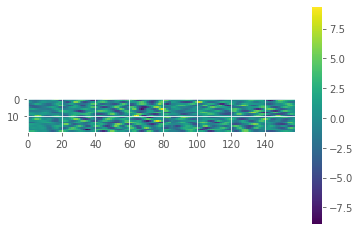

In [27]:
plt.imshow(srm.s_, cmap='viridis')
plt.colorbar()


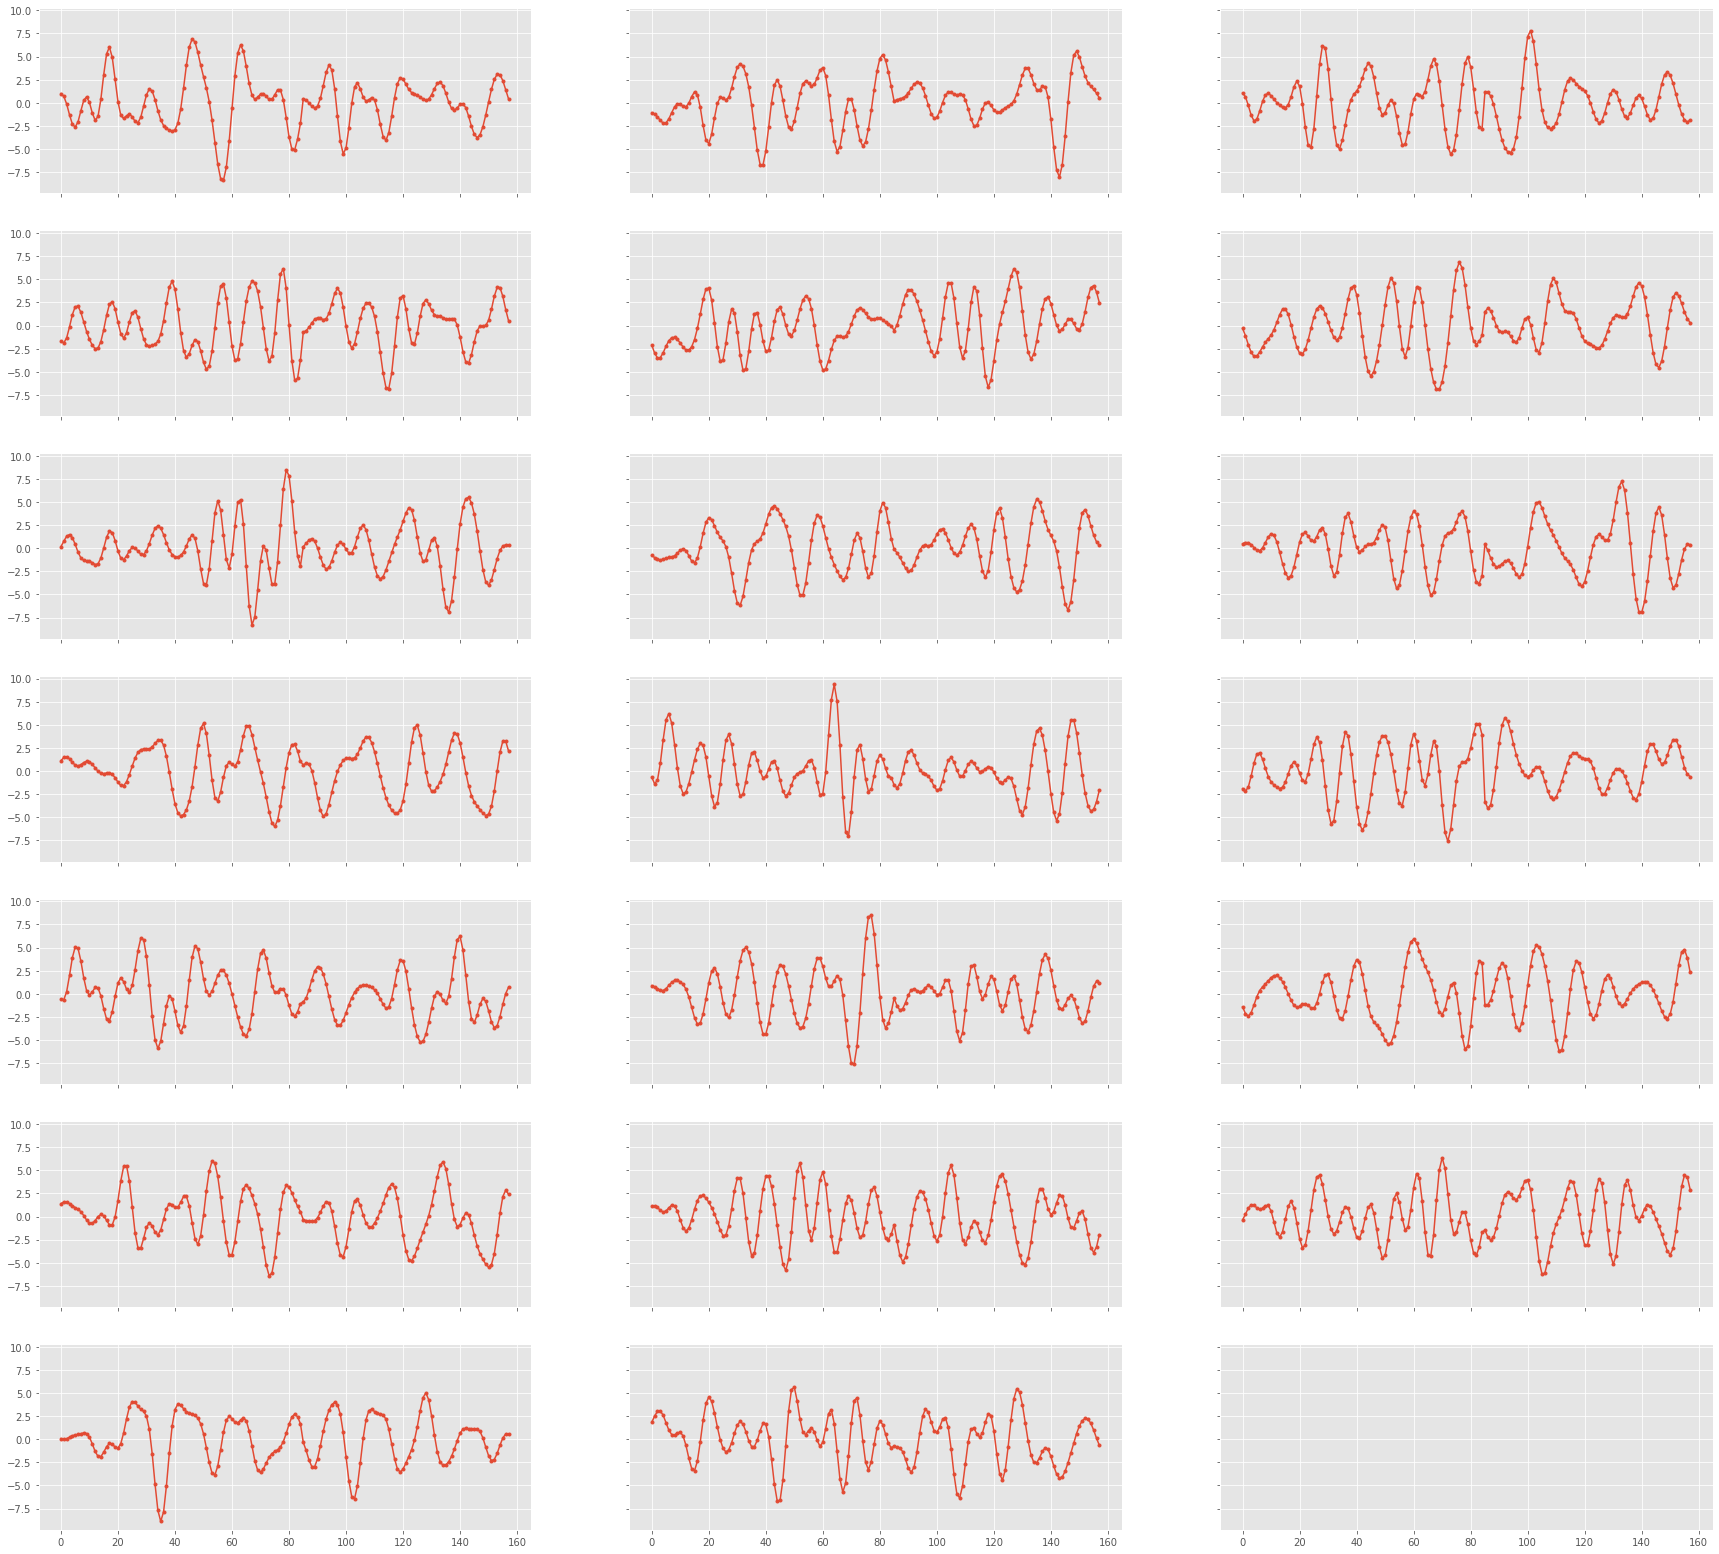

In [28]:
plt.style.use('ggplot')

x = srm.s_

ncols = 3
nrows = math.ceil(features / ncols)
fig, axs = plt.subplots(nrows, ncols, figsize=(10 * ncols, nrows * 4), sharex=True, sharey=True)
for _x, ax in zip(x, axs.flat):
    ax.plot(_x, marker='.', label='x')

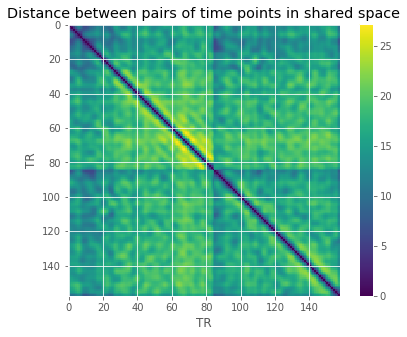

In [29]:
dist_mat = sp_distance.squareform(sp_distance.pdist(srm.s_.T))
plt.figure(figsize=(7,5))
plt.title('Distance between pairs of time points in shared space')
plt.xlabel('TR')
plt.ylabel('TR')
plt.imshow(dist_mat, cmap='viridis')
plt.colorbar()


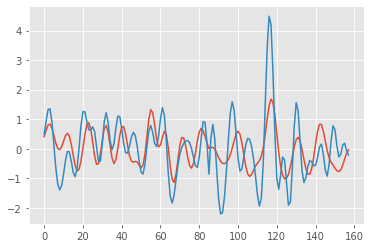

In [31]:
w = srm.w_[0]
y = data[0]
y_hat = w @ srm.s_

plt.plot(y_hat[1,:], label='y_hat')
plt.plot(y[1,:], label='y')